In [67]:
import cv2
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

## Load images dataset

In [68]:
from PIL import Image

IMAGE_DIR = "../fashion_images/dataset_clean"

images = []
image_paths = []

# iterate to call images data
for root, _, files in os.walk(DATASET_DIR):
    for filename in files:
        if filename.lower().endswith(".jpg"):
            path = os.path.join(root, filename)
            image = Image.open(path).convert("RGB")
            images.append(image)
            image_paths.append(path)
    
print(f"Loaded {len(images)} JPG Images")

Loaded 8625 JPG Images


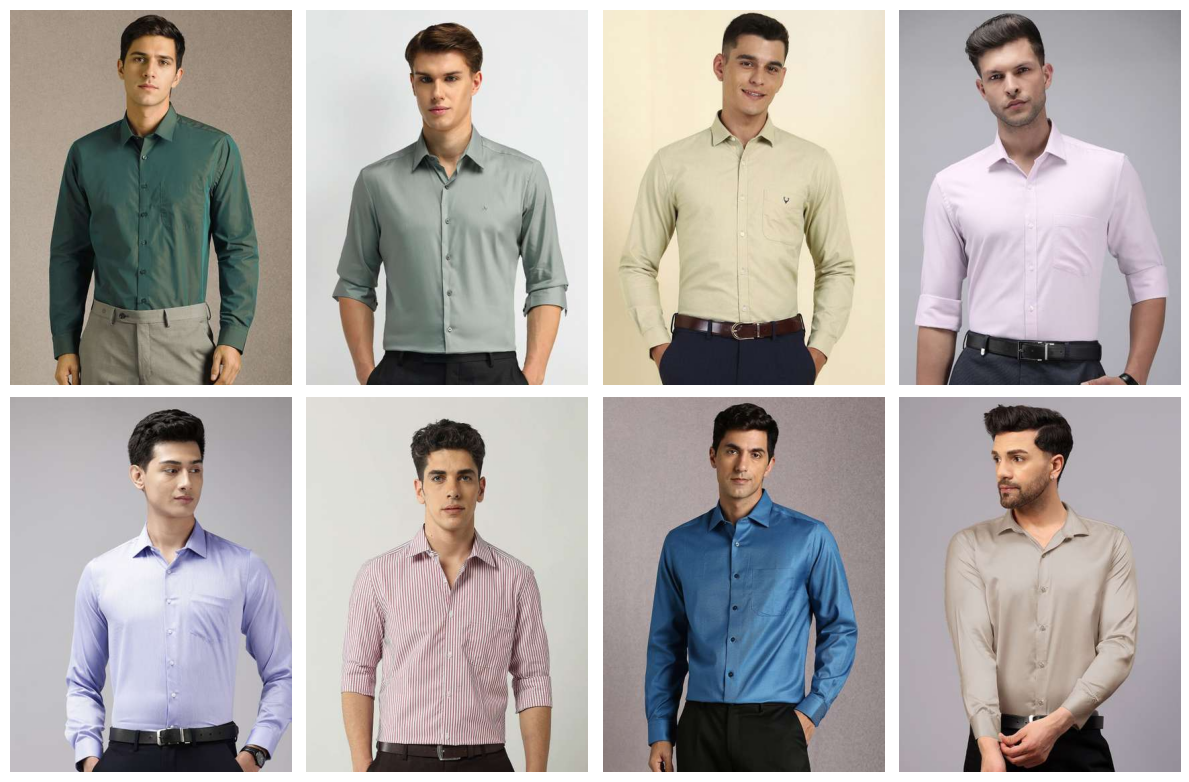

In [69]:
# show multiple images
import matplotlib.pyplot as plt

def show_images(images, cols=4, figsize=(12, 8)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)

    for i, img in enumerate(images):
        plt.subplot(rows, cols,  i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Usage
show_images(images[:8], cols=4)

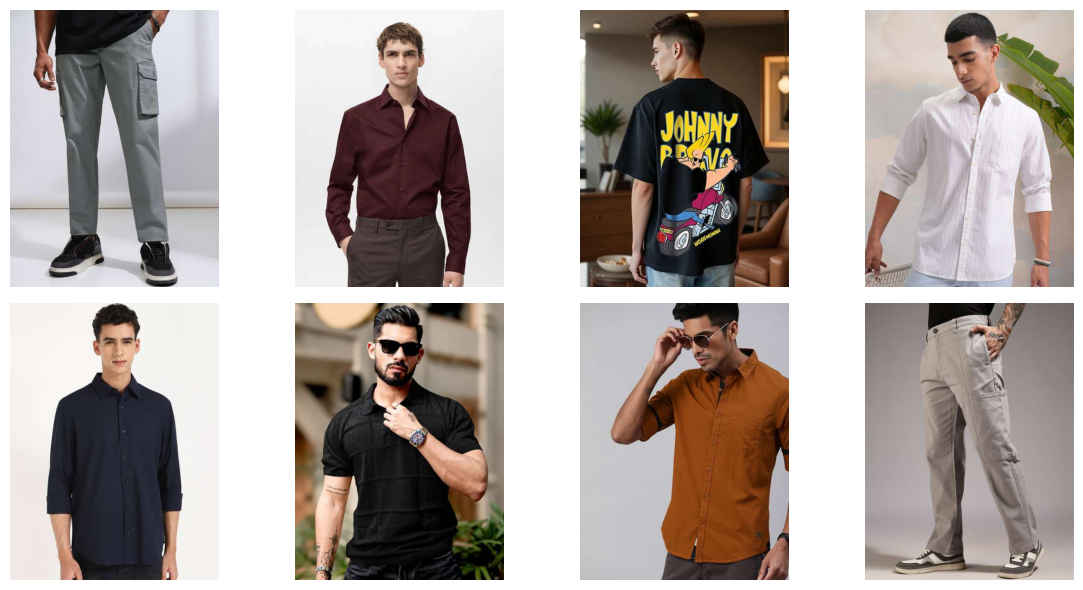

In [70]:
# Show random images

import random
import matplotlib.pyplot as plt

def show_random_images(images, n=8, cols=4, figsize=(12, 6)):
    n = min(n, len(images))
    selected = random.sample(images, n)

    rows = (n + cols - 1) // cols
    plt.figure(figsize=figsize)

    for i, img in enumerate(selected):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# Usage
show_random_images(images, n=8)

# Data pipeline

### 1. Common Matching Scenarios
### 2. Complete Matching Pipeline
### 3. Handle missmatch data pipeline
### 4. Create Image-Metadata Dictionary
### 5. Load and Preprocess Images
### 6. Create Dataset Class for PyTorch
### 7. Quality Checks

## Common Matching Scenarios

In [74]:
# Direct matching pipeline

PARQUET_PATH = "hdfs/fashion_dataset"
df = pd.read_parquet(PARQUET_PATH) # Load dataset from parquet

# Check image directory
IMAGE_DIRECT = '../fashion_images/dataset_clean'

# Get all .jpg files from all subdirectories
jpg_files = []
for category in os.listdir(IMAGE_DIR):
    category_path = os.path.join(IMAGE_DIR, category)
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            if file.endswith('.jpg'):
                jpg_files.append(os.path.join(category_path, file))

print(f"Total images: {len(jpg_files)}")

Total images: 8625


In [75]:
df.columns.tolist()

['item_id',
 'category',
 'subcategory',
 'sleeve_type',
 'season',
 'fabric',
 'occasion',
 'formality_level',
 'size_range',
 'brand',
 'view_count',
 'click_count',
 'purchase_count',
 'length_cm',
 'price',
 'stocks']

In [ ]:
# Images named by ID

df['image_path'] = df['item_id'].apply(lambda x: f"{jpg_files}{x}.jpg")

# Tensorflow deep learning model
# Purpose project:
### **Extracting images features to model which are integrated to business problem**
### * **enabling robust modeling of user preferences.**
### * **recommendation algorithms have progressively evolved from linear models to deep neural networks**
### * **multimodal deep learning framework that integrates visual, textual, and price features for business insight**
### * **Try to match outfit features top and bottom wearing (Optional task)**

In [72]:
import tensorflow as tf